# **4. Respuestas a otras preguntas relevantes**

In [1]:
#Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from itertools import combinations

sys.path.insert(0, os.path.abspath("..")) 

#Formulas
from data_loader import load_pkl
from data_visualization import top_genre_pairs

#DataFrames
movieBasics= load_pkl("movie.basics.clean.pkl")
titleRating= load_pkl("title.ratings.clean.pkl")

In [2]:
#Creación DataFrames unidos

mov_rat= pd.merge(movieBasics, titleRating, on="tconst", how="inner")

-   ### **<u>Combinaciones de géneros que destaquen más</u>**

Para analizar la combinación de géneros más destacables, vamos primero a filtrar los géneros que según el análisis de los anteriores puntos han demostrado no ser buenas opciones, y por el contrario, centrarnos en los que más han destacado por diferentes motivos.  

Para ello se va a esteblecer un sistema de ponderación por género. Es decir, los géneros que tras el análisis se ha visto que tienen más pontencial recibirán un "peso" mayor en el analisis. 
Estos serán los pesos:

-   **PESO 0.3 :**  Adulto, Talk-Show, Reality-TV, Game-Show -> debido a ser géneros muy poco populares, con valoraciones medias bajas, y ser géneros considerados de "nicho". 
-   **PESO 0.5 :**  News, Film-Noir, Sport, Western, Short -> Destacan algo mas que los géneros anteriores ya sea en valoración o número de votos, pero siguen siendo bastante bajos en ambos.
-   **PESO 0.7 :**  Terror, Sci-fi, Misterio, Musical, Sport, Animación -> Son géneros un poco mas equilibrados, pero o tienen valoraciones por debajo de la media, o son géneros mas nicho.
-   **PESO 0.8 :**  Guerra, Familia, Fantasía, Música, Biografía -> Estos géneros ya tienen buenas valoraciones, y son populares, pero no destacan tanto como otros géneros.
-   **PESO 0.9 :**  Documental, Accion, Romance, Historia, Comedia -> Un paso por debajo de ser los géneros mejor valorados / msa votados.
-   **PESO 1.0 :**  Drama, Aventura, Crimen, Thriller -> Los géneros que tienen mejor mezcla de número de votos y valoración (dando algo mas de valor al número de votos)

In [3]:
top_genre_pairs (mov_rat)

Top 10 combinaciones de géneros:

('Drama', 'Thriller') → Puntuación: 0.46 | Rating Promedio: 5.86 | Votos Promedio: 7180 | Votos totales: 83374339
('Drama', 'Romance') → Puntuación: 0.44 | Rating Promedio: 6.19 | Votos Promedio: 4489 | Votos totales: 106577426
('Romance', 'Thriller') → Puntuación: 0.41 | Rating Promedio: 5.82 | Votos Promedio: 2946 | Votos totales: 3346917
('Film-Noir', 'Thriller') → Puntuación: 0.39 | Rating Promedio: 6.62 | Votos Promedio: 3698 | Votos totales: 170117
('Drama', 'Film-Noir') → Puntuación: 0.39 | Rating Promedio: 6.46 | Votos Promedio: 4939 | Votos totales: 3956207
('Drama', 'Sci-Fi') → Puntuación: 0.39 | Rating Promedio: 5.72 | Votos Promedio: 18073 | Votos totales: 34953945
('Biography', 'Drama') → Puntuación: 0.38 | Rating Promedio: 6.64 | Votos Promedio: 12801 | Votos totales: 69819114
('History', 'Thriller') → Puntuación: 0.37 | Rating Promedio: 6.51 | Votos Promedio: 17576 | Votos totales: 3005501
('Drama', 'Horror') → Puntuación: 0.37 | Rating 

Esta lista nos indica qué combinación de géneros son los más recomendades teniendo en cuenta:

-   El sistema de ponderación por género (el peso que se le ha dado)
-   Una importancia del 40% al Rating Promedio, un 50% al número de votos Promedio y un 10% a los votos totales.
-   Solo usando combinaciones de géneros con un mínimo de 500 votos promedios.

Como se ha analizado anteriormente se le da más valor al número de votos promedio (debido a que se puede asociar a una cantidad mayor de visualizaciones), ligeramente menor a la valoración (también hemos observado la importancia de la valoración en el número de votos) y el número de votos solo ligeramente (para descartar combinaciones de género que se consideren demasiado nicho, y ver cuales se saben que realmente han funcionado con anterioridad)

En el top 10 domina el Drama (debido a la enorme diferencia de numero de votos totales y una valoración promedio) con otros géneros que también tienen una buena combinación de votos y valoración. También aparecen otras combinaciones interesantes cómo: **Film-Noir y Thriller, o Romance y Thriller.** 

**Respecto al Drama parece que lo que mejor funciona es el Thriller y el Romance.** 

Para analizar los géneros (más allá del Drama) más destacados sacaremos un listado filtrando por género.

In [ ]:
top_genre_pairs (mov_rat, "Thriller")
top_genre_pairs (mov_rat, "Adventure")
top_genre_pairs (mov_rat, "Crime")

Top 10 combinaciones de géneros que incluyen 'Thriller':

('Drama', 'Thriller') → Puntuación: 0.47 | Rating Promedio: 5.86 | Votos Promedio: 7180 | Votos totales: 83374339
('Romance', 'Thriller') → Puntuación: 0.42 | Rating Promedio: 5.82 | Votos Promedio: 2946 | Votos totales: 3346917
('Film-Noir', 'Thriller') → Puntuación: 0.40 | Rating Promedio: 6.62 | Votos Promedio: 3698 | Votos totales: 170117
('History', 'Thriller') → Puntuación: 0.38 | Rating Promedio: 6.51 | Votos Promedio: 17576 | Votos totales: 3005501
('Sci-Fi', 'Thriller') → Puntuación: 0.38 | Rating Promedio: 5.01 | Votos Promedio: 14372 | Votos totales: 19316033
('Biography', 'Thriller') → Puntuación: 0.37 | Rating Promedio: 6.30 | Votos Promedio: 20390 | Votos totales: 1366157
('Horror', 'Thriller') → Puntuación: 0.37 | Rating Promedio: 4.93 | Votos Promedio: 6274 | Votos totales: 40777448
('Crime', 'Thriller') → Puntuación: 0.36 | Rating Promedio: 5.90 | Votos Promedio: 10469 | Votos totales: 61337489
('Action', 'Thril

Observando los géneros que mas se han destacado en el resto del análisis las recomendaciones para unas buenas combinaciones son:

-   **Drama con: Thriller, Romance.** -> *Siendo con Romance mejor valorado, y con Thriller más valorado*
-   **Thriller con: Film-Noir, Historico** -> *Ambas combinaciones tienen una muy buena valoración con un buen número de votos, siendo una opción muy sólida.*
-   **Aventura con: Animación, Drama**  -> *Animación tiene una buena valoracion con aventura, pero con Drma es más valorado*
-   **Crimen con: Biografía, Drama** -> *Siendo de las dos la más interesante la Biografía por su alta valoración y su popularidad*

-   ### **<u>Caracterísitcas del Top 1%</u>**

In [3]:
#Creación df del top 1%
df= mov_rat[mov_rat["numVotes"]>=1000].copy()

umbral_rating = df["averageRating"].quantile(0.97)
umbral_votes = df["numVotes"].quantile(0.97)

df= df[(df["averageRating"] >= umbral_rating) | (df["numVotes"] >= umbral_votes)]

In [4]:
from data_visualization import top_gen_df

top_gen_df (df, mov_rat)

,% Top1,% Total,Diferencia
genres,,,
Drama,21.9%,26.5%,-4.6%
Comedy,11.0%,14.2%,-3.2%
Action,10.4%,5.5%,4.9%
Adventure,8.0%,3.4%,4.7%
Crime,6.0%,5.1%,0.9%
Thriller,5.7%,4.9%,0.9%
Romance,4.9%,6.3%,-1.4%
Documentary,4.7%,10.7%,-5.9%
Sci-Fi,3.3%,1.4%,2.0%


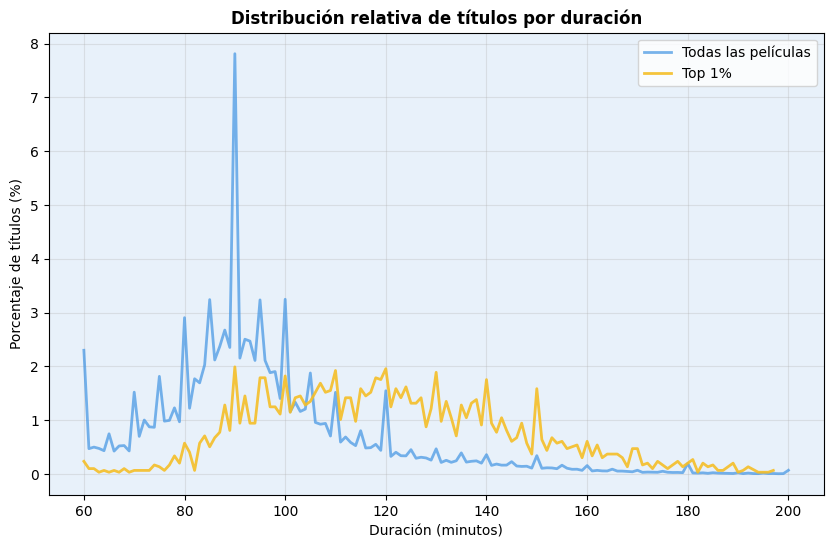

In [5]:
from data_visualization import top_dur_df

top_dur_df (df, mov_rat)

La comparativa entre el TOP 1% (según el número de votos y la valoración) nos revela que la duración suelen tender a ser más larga en los títulos del 1%. Estando la mayoría entre 90 y 140 minutos.

Además las diferencias de género entre el top 1% y el resto, aunque siguen destacando los mismos géneros, no en los mismos porcentajes.  El Drama, Documental y la Comedia son algo menos populares. Mientras que los géneros de Acción, Aventura y Thriller son más abundantes. 

Esto nos da una visión genérica, en el caso de querer ser más ambiciosos, de que tendencias se debería de seguir para un título en el top 1%.